In [14]:
#importing all the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [15]:
#Load the Datasets
athletes = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")

In [18]:
#Checking the first 5 rows of our Datasets
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
#Checking the first 5 rows of our Datasets
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 1. First, lets join the two DataFrames to each other

In [9]:
athletes_df = athletes.merge(region, how='left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# 2. After merging the two tables together, now lets analyze the shape of our Data.

In [12]:
athletes_df.shape

(271116, 17)

we have 271116 rows and 17 columns combined.

# 3. Lets use the The info() method that will print information about our DataFrame

In [13]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


# 4. Now lets perform the describe () function, to Analyzes both numeric and object series

In [20]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# 5. Let's determine our Null values ( Missing Values) and print them

In [26]:
# Finding out the null values in our columns.
nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [25]:
# How many null values do we have?
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [27]:
#Printing the columns names containing null values 

athletes_df.columns[athletes_df.isnull().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'region', 'notes']

# 6. Analysis and information about the National Teams participating in the Olympics:

In [28]:
# Team Canada
athletes_df.query('Team=="Canada"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
269,140,"William ""Bill"" Abbott Jr.",M,42.0,172.0,80.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
270,140,"William ""Bill"" Abbott Jr.",M,46.0,172.0,80.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
279,146,Jeremy Abbott,M,19.0,179.0,71.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",NaN,Canada,NaN
280,147,Joanne Abbott,F,41.0,160.0,57.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
281,148,"Kathryn ""Katie"" Abbott",F,21.0,164.0,63.0,Canada,CAN,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Women's Three Person Keelboat,NaN,Canada,NaN


In [36]:
# Team USA
athletes_df.query('Team=="United States"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [33]:
#Team Japan
athletes_df.query('Team=="Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [34]:
# Top Countries Participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation by Countries'}, ylabel='Team'>

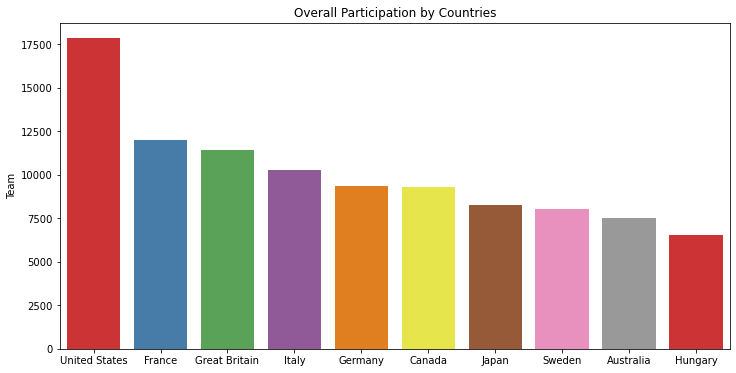

In [38]:
# Visualization of the top 10 Countries
plt.figure(figsize=(12,6))

# Include a title for our visualization 
plt.title("Overall Participation by Countries")
sns.barplot(x=top_10_countries.index , y = top_10_countries, palette ='Set1')

In [39]:
#Index of the countries
top_10_countries.index

Index(['United States', 'France', 'Great Britain', 'Italy', 'Germany',
       'Canada', 'Japan', 'Sweden', 'Australia', 'Hungary'],
      dtype='object')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

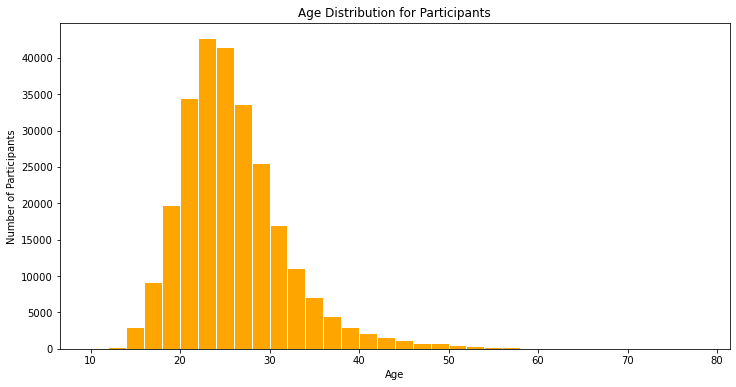

In [43]:
# Age Distribution for the Patricipants 

plt.figure(figsize=(12,6))

plt.title("Age Distribution for Participants")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2),color='orange', edgecolor='White')

In [45]:
# Exploring Unique Winter Sports

winter_sports = athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [47]:
# Exploring Unique Summer Sports
summer_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [49]:
# Count of the genders Participating 
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

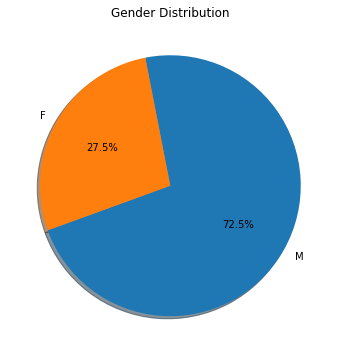

In [50]:
# Pie plot for male and female Participants

plt.figure(figsize=(12,6))

plt.title("Gender Distribution")

plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%', startangle=200,shadow=True)
plt.show()

In [52]:
# Total medels
athletes_df.Medal.value_counts()


Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [53]:
# Total number of female athletes in each olmypics
female_participant=athletes_df[(athletes_df.Sex=='F')&(athletes_df.Season=='Summer')][['Sex','Year']]
female_participant=female_participant.groupby('Year').count().reset_index()
female_participant.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


Text(0.5, 1.0, 'Women Participation')

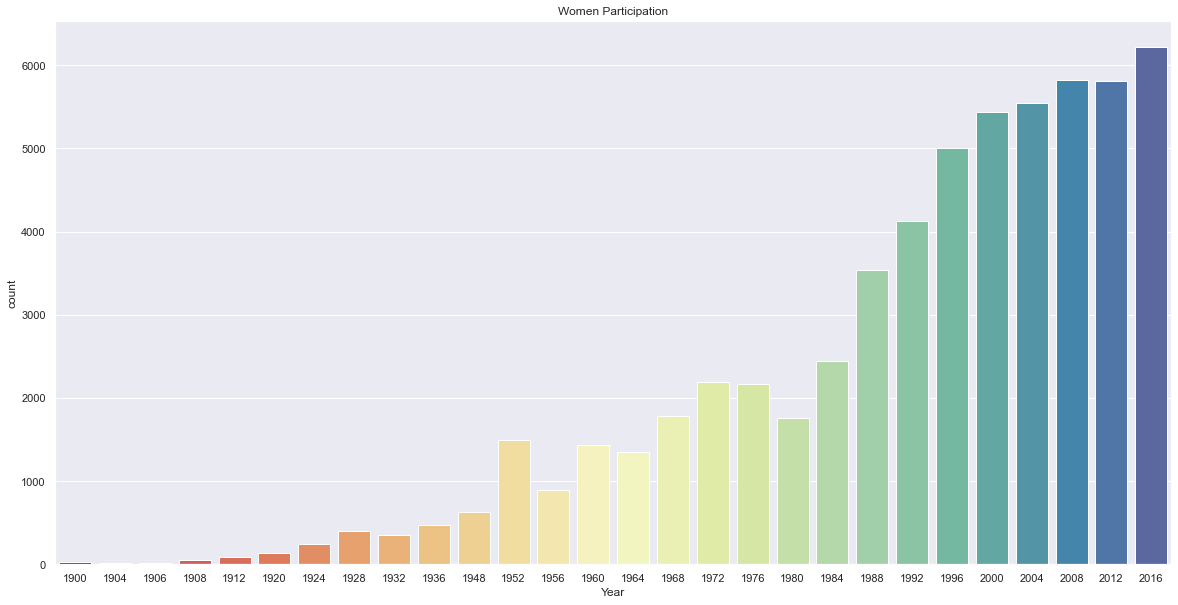

In [54]:
#plot
womenolympics=athletes_df[(athletes_df.Sex=='F')& (athletes_df.Season=='Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenolympics, palette='Spectral' )
plt.title("Women Participation")

Text(0.5, 1.0, 'Male Participation')

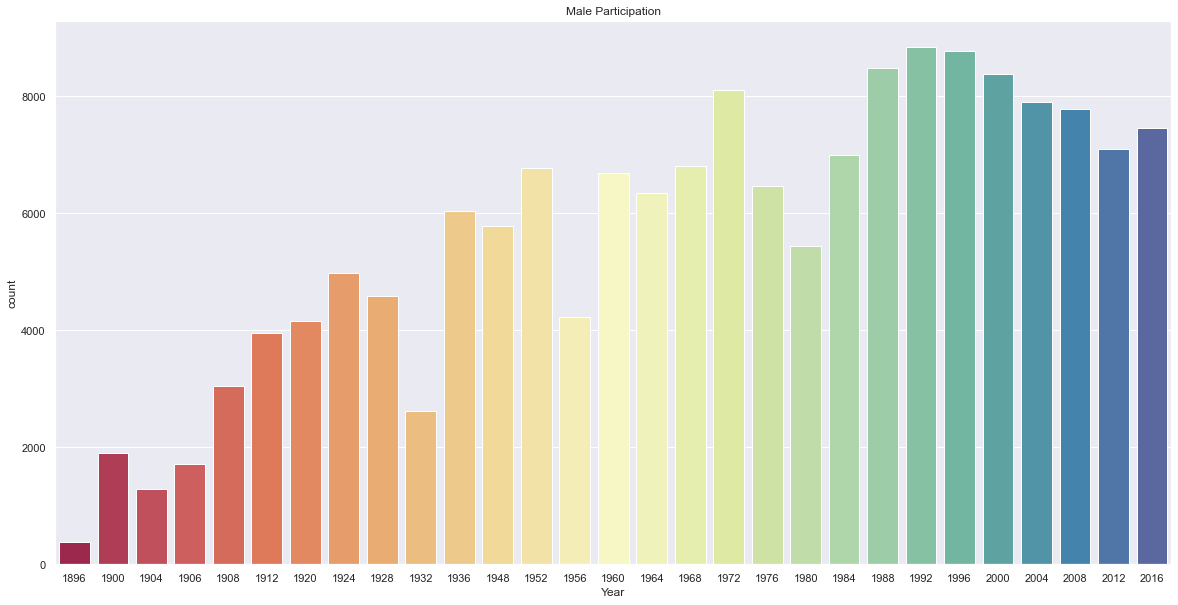

In [55]:
#Male Participation and plot
Maleolympics=athletes_df[(athletes_df.Sex=='M')& (athletes_df.Season=='Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=Maleolympics, palette='Spectral' )
plt.title("Male Participation")

In [57]:
# Gold medals Atheletes
gold_medals=athletes_df[(athletes_df.Medal=='Gold')]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [58]:
# sports that won the Gold Medal
sporting_event=gold_medals['Sport'][gold_medals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\alboc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold medals for Atheletes for over 60 year')

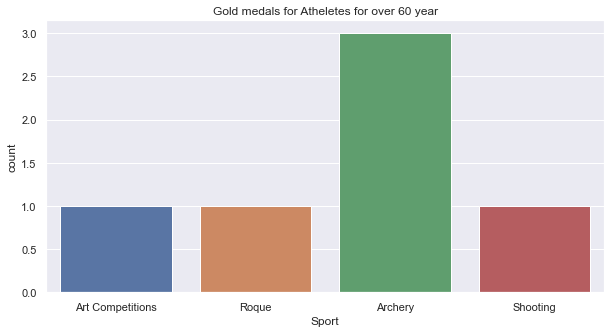

In [59]:
# plot the Gold Medals
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title("Gold medals for Atheletes for over 60 year")

In [64]:
# Countries that won the most Gold Medals
gold_medals.region.value_counts().reset_index(name="Medal").head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Gold Medals per country')

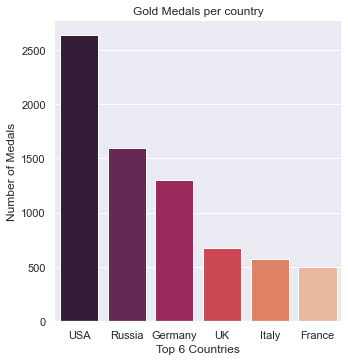

In [66]:
# Plot 

TotalGoldmedals=gold_medals.region.value_counts().reset_index(name="Medal").head(6)
g=sns.catplot(x="index",y="Medal",data=TotalGoldmedals,height=5,kind="bar",palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 6 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals per country")

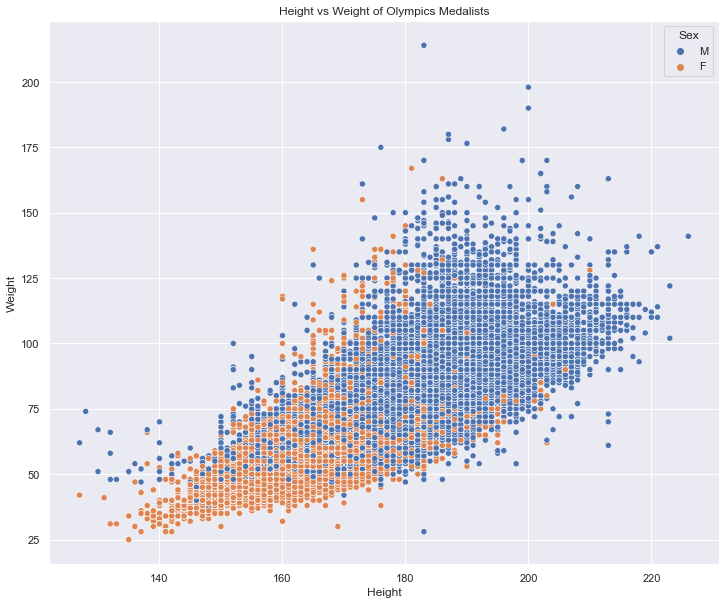

In [67]:
# Athletes who won the medal
not_null_medals=athletes_df[(athletes_df['Height'].notnull())&(athletes_df['Weight'].notnull())]
plt.figure(figsize=(12,10))
axis=sns.scatterplot(x="Height",y="Weight", data=not_null_medals,hue="Sex")
plt.title('Height vs Weight of Olympics Medalists')
plt.show()

# The End.